#**Objectives**

* [**Introduction to Regression**](#scrollTo=wgt7Yxc6WwcV&line=1&uniqifier=1)
* **Hands-on**
  * [**Linear Regression**](#scrollTo=bs5GXp5A5j-h)<br>
    * [**Simple Linear**](#scrollTo=T5g6reUk-5ii)
    * [**Multi-linear**](#scrollTo=-Z2ns7CW--TG)
    * [**Polynomial**](#scrollTo=OK34fAC1_FO1)
    * [**Results Summary**](#scrollTo=vdCexGtlV5ia)
* **Appendix**
  * [**Arrays with Numpy**](#scrollTo=mTO32fTDhoD_&line=1&uniqifier=1)



## **Using Chat GPT-4 (or GPT-3.5) as a coding tutor when learning this workshop on your own.**
There are several ways that GPT can help improve your self-learning process. ChatGPT can be used as a coding tutor to help:
* Explain new concepts in other words. Ask it to give basic, intermediate, or advanced explanations of coding concepts depending on your familiarity and comfort level.
* Guide you through the exercises and explain the logic and code. If you get stuck with the exercises, you can ask GPT to give you a step-by-step guide to the exercise so you better understand the learning objectives. For best results, be very specific with ChatGPT so it has the necessary context to best help you.

* Give you more exercises. If you aren't sure you understand a concept and want to test your knowledge, ask ChatGPT to give additional exercises to help test your abilities and understanding. They can be coding problems, multiple choice, fill in the blank, or whatever will work best for your learning style. Be creative and get the support you want.

The AI has infinite patience, so ask as many questions as you want!


### **The Emotion Emojis**

As you go through this workshop, you will notice **Emotion Emojis** embedded throughout. They accompany bolded terms that are the fundamental concepts that python programming is built upon. The key thing here is **if you see an emoji, consider asking ChatGPT about the bolded concept**. For fun, we have gamified this by thinking of the emojis as emotions you can see on a emotional daily life while learning a new concept.
  - To collect all the emotions, you should follow the workshop section by section and add your found emotion (new coding concept) to the end of the following prompt and take it to ChatGPT:

 `You are going to take on the role of an excellent python coding tutor. I'm a beginner learning to program in python. In simple terms, please give me an overview and explanation of the following concept:  `

  - You can add more surrounding components to the prompts to make it more clear. For example, maybe you know another language and want ChatGPT to compare how the concept works in R or C++ to help you better understand.



### **Disclaimer**

"ChatGPT may produce inaccurate information about people, places, or facts." -OpenAI



*   Outputs may be inaccurate, untruthful, and otherwise misleading.
*   ChatGPT is not connected to the internet. (although this feature is now available with ChatGPT Plus as a beta feature)
*   It has limited knowledge of world and events after September 2021.
*   It may produce biased content.
*   It will not cite sources.

Always use caution when interacting with LLM AI systems. Despite the large bounds in progress and capability, they are still in early versions and teams of people are working to fix short comings and mistakes each and every day. Despite how useful they can be as coding tutors, it is important to remember that their outputs should be met with a healthy amount of skepticism.

## **Introduction**

* 🥰**Regression analysis** identifies and analyzes the relationship between 'dependent' (***outcomes/responses***) and 'independent variables' (***predictors/features/covariates***)
* Regression is used for forecasting, finding the cause and effect

* Some of the basic relations/equations:
  * Linear Regression - ***Y = a.X + b + ϵ***
  * Multi-linear Regression - ***Y = a$_1$.X$_1$ + a$_2$.X$_2$ + a$_3$.X$_3$ + ....... + a$_n$.X$_n$ + b + ϵ***
  * Polynomial Regression - ***Y = a$_1$.X + a$_2$.X$^2$ + a$_3$.X$^3$ + ........ + a$_n$.X$^n$ + b + ϵ***<br>
  where, <br> Y = Dependent variable (ARRAY)<br>
  X, X$_1$, X$_2$, X$_3$...., X$_n$ = Independent variables (ARRAY) <br>
  a, a$_1$, a$_2$, ......, a$_n$ = Slopes/Coefficients of independent variables <br>
  b = Intercept<br>
  ϵ = Error


* Popular libraries, modules and frameworks used for regression analysis in Python - [numpy](https://numpy.org/doc/stable/), [pandas](https://pandas.pydata.org/docs/), [matplotlib](https://matplotlib.org/), [scikit-learn](https://scikit-learn.org/stable/index.html), [statsmodels](https://www.statsmodels.org/stable/index.html), [tensorflow](https://www.tensorflow.org/overview), [pytorch](https://pytorch.org/tutorials/)












### 😎**Steps invloved in regression analysis:**
  1. ***Data collection***: Gather the data for analysis
  2. ***Data cleaning***: Preprocess the data by fixing any errors or missing values, removing the outliers, renaming the variables etc.
  3. ***Split the data into training and testing datasets:*** Split the dataset into training and testing datasets for an unbiased evaluation of the model
  4. ***Choose the type of regression:*** Depending on the nature of the data and application, choose a regression type to fit the data
  5. ***Estimate the coefficients:*** Estimate the parameters/coefficients of regression using the trained model
  6. ***Evaluate the model:*** Use the error metrics and the best line/curve to evaluate the model's performance
  7. ***Analyze the results:*** Interpret the results from the analysis and establish a relationship between the dependent and independent variables

**About Data**<br>
'Automobile' dataset that shows the specifications of an automobile in terms of various characteristics <br>
Source - **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)**

In [ ]:
!wget https://raw.githubusercontent.com/The-CEAS-Library/Data-Analysis-with-Python-Linear-Regression/main/auto.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


automobile = pd.read_csv('auto.csv')
automobile

### 🤔**Data Cleaning**
* Replace or drop the values that are irrelevant for the analysis
* Drop the unnecessary columns from the dataframe object
* Change the datatypes of the columns as needed

In [ ]:
# Replace any missing values with NaNs
automobile.replace('?', np.nan, inplace = True)

# Drop the unnecessary columns
auto_df = automobile.drop(['normalized losses','symboling'],axis=1)

# Drop the NaNs, reset the index
auto_df = auto_df.dropna().reset_index().drop(['index'],axis=1)

# Change the datatype of a column as per the requirement
auto_df[['price','horsepower']] = auto_df[['price','horsepower']].astype(dtype = 'float64')


### 😘**Correlation in the Dataframe**

* Create a correlation matrix to get the correlation between the variables/features/columns of the dataframe.
  * A value of **'1'** represents a **strong positive correlation**, while a **'-1'** means a **strong negative correlation** and a **'0'** has **no correlation**.
  * Use pandas' **'corr()'** method on the dataframe object to create the correlation matrix.


In [ ]:
# Correlation matrix
corr_mat = auto_df.corr(numeric_only=True)
corr_mat


* Visualize these correlations on a heatmap using seaborn's 🤗**'heatmap()'**

In [ ]:
# Generate the heatmap
sns.heatmap(corr_mat, annot=True, cmap='gray')
plt.show()

* Visualize the trends, patterns and outliers in the data using seaborn's 😆**'pairplot()'**

In [ ]:
# Generate the pairplot
sns.pairplot(data=auto_df,hue='style')
plt.show()

##😙**Linear Regression**
* One of the fundamental techniques in Statistics and Machine Learning
* It is used when the dependent variables are continuous
* Simple, easy to build a model and analyze the results
* **Assumptions**:
  * All variables are considered continuous
  * Data is clean without missing values, and outliers
  * Linear relationship between the dependent and independent variables
  * All predictors are independent of each other
  * Errors are normally distributed



###🤩**Simple Linear Regression**
* Simple linear regression has only one independent variable
* Here is the general equation for a simple linear regression - <br>
  ***Y = a.X + b + ϵ***<br>


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assign data for predictor (independent) variable and target (dependent) variable
x = np.array(auto_df['horsepower']).reshape(-1,1)
y = auto_df['price']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Choose the regression model
reg_model = LinearRegression()

# Fit the training datasets to the chosen regression model
reg_fit = reg_model.fit(x_train, y_train)

# Get the coefficient of determination/R-squared value
r_sq = reg_fit.score(x_train, y_train)
#r_sq = reg_fit.score(x_test, y_test)

print("Value of R-square: ", r_sq)

print("Intercept: ", reg_model.intercept_)

print("Coefficient: ", reg_model.coef_)


####**Model Prediction**
* Use the test dataset to predict new values from the trained model
* Find the mean squared or root mean squared errors between the test set values and the predicted values of the dependent variable
* Plot the training dataset and the best-fit line to evaluate the performance of the model


In [ ]:
# Predict the y values using the test dataset
y_pred = reg_model.predict(x_test)

# Find the mean squared/root mean squared error between the predicted and test datasets of 'y'
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)

# Visualize the training dataset with a scatterplot
plt.scatter(x_train,y_train)

# Plot the best fit line using the predicted values of 'y'
plt.plot(x_test,y_pred,'r')
plt.xlabel('horserpower')
plt.ylabel('price')
plt.grid()
plt.show()



###🤨**Multi-linear Regression**
* Linear regression with two or more independent variables
* General equation for the multi-linear regression:<br>
  ***Y = a$_1$.X$_1$ + a$_2$.X$_2$ + a$_3$.X$_3$ + ....... + a$_n$.X$_n$ + b + ϵ***

In [ ]:
x1 = np.array(auto_df[['horsepower','highway mpg']]).reshape(-1,2)
y1 = np.array(auto_df['price'])

# Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1)

# Choose the model and fit the training datasets to the model
multi_model = LinearRegression().fit(x1_train, y1_train)

# Get the R-squared value from the training datasets (Recommended to use test dataset)
r_sq = multi_model.score(x1_train, y1_train)

print("Value of R-squared: ", r_sq)

print("Intercept: ", multi_model.intercept_)

print("Coefficients: ", multi_model.coef_)

####**Model Prediction**


In [ ]:
# Predict the y1 values from test dataset
y1_pred = multi_model.predict(x1_test)

# Find the mean squared/root mean squared error between the predicted and test datasets of 'y'
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)
# Plot the predicted and actual values on the scatterplot
plt.scatter(y1_test, y1_pred)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=3)
plt.plot()

In [ ]:
# Visualize the best fit line/plane on a surface plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(auto_df['horsepower'], auto_df['highway mpg'], auto_df['price'])

# Create a rectangular grid with co-ordinates for the 2D axes
x_1, x_2 = np.meshgrid(auto_df.loc[:,'horsepower'], auto_df.loc[:,'highway mpg'])

# Predicted values
y_pred_surf = multi_model.intercept_ + multi_model.coef_[0]*x_1 + multi_model.coef_[1]*x_2

# Plot the surface with 3 variables
ax.plot_surface(x_1, x_2, y_pred_surf)
ax.set_xlabel('horsepower')
ax.set_ylabel('highway mpg')
ax.set_zlabel('price')
plt.show()


##**Exercise 1**

* Create a linear regression model that predicts the **'highway mpg'** of an automobile for a given **'city mpg'**.
  * Use simple linear regression to train the model
  * Evaluate the model by printing the error metrics, R$^2$  value
  * Plot the best fit line between the predicted and test values

###.😊**Polynomial Regression**
* Polynomial dependence between the dependent and independent variables
* General equation of polynomial regression:<br>
  ***Y = a$_1$.X + a$_2$.X$^2$ + a$_3$.X$^3$ + ........ + a$_n$.X$^n$ + b + ϵ***

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x2 = np.array(auto_df['horsepower']).reshape(-1,1)
y2= np.array(auto_df['highway mpg'])

# Split data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2)


# Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias = False)

# Transform the training and test data set to the polynomials
x2_train_poly = poly.fit_transform(x2_train)
x2_test_poly = poly.fit_transform(x2_test)

# Fit the model using polynomial features
poly_model = LinearRegression().fit(x2_train_poly, y2_train)

# Return the R-squared value
r_sq = poly_model.score(x2_test_poly,y2_test)

print("Value of R-squared: ", r_sq)

print("Intercept: ", poly_model.intercept_)

print("Coefficients: ", poly_model.coef_)



####**Model Prediction**


In [ ]:
# Predict the y2 values using the model
y2_pred = poly_model.predict(x2_test_poly)


# Get the mean squared/root mean squared error
mse2 = mean_squared_error(y2_test, y2_pred, squared = False)

print("Root Mean Squared Error: ", mse2)

# Predict the new output values
# x_min, x_max = x2.min(), x2.max()
# x_fit = np.linspace(x_min, x_max, 100)
# y_fit = poly_model.predict(poly.transform(x_fit.reshape(-1, 1)))

# Visualize the training and test datasets with the best fit line
# plt.scatter(x2_train,y2_train, color = 'blue', label = 'Training Data')
# plt.scatter(x2_test,y2_test, color = 'red', label = 'Testing Data')
# plt.plot(x_fit, y_fit, color='black', label='Model Prediction')
# plt.xlabel('horsepower')
# plt.ylabel('highway mpg')
# plt.legend()
# plt.show()


##**Get More Information on Regression with 😚'*statsmodels*'**
* [statsmodels](https://www.statsmodels.org/stable/index.html) - A module used for statistical estimation, exploration and tests
* statsmodels provides additional functionalities for regression analysis such as hypothesis testing, model diagnostics and predictions
* Ordinary least squares (OLS) method for the linear regression

In [ ]:
import statsmodels.api as sm

# Function to perform simple linear regression with statsmodels
def automobile(x3, y3):

  # Split data into training and testing sets
  x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3)

  # Create a constant vector in the training dataset
  x3_train_sm = sm.add_constant(x3_train)

  # Choose the model and provide inputs to the model - ordinary least squares(OLS)
  model_stats = sm.OLS(y3_train, x3_train_sm)

  # Fit the model
  results = model_stats.fit()

  results.fittedvalues
  x3_test_sm = sm.add_constant(x3_test)

  # Predict the new outcomes
  y3_pred = results.predict(x3_test_sm)

  # Visualize the training and test datasets with the best fit line
  plt.scatter(x3_train, y3_train)
  plt.plot(x3_test, y3_pred, color='r')
  plt.xlabel('highway mpg')
  plt.ylabel('price')
  plt.grid()
  plt.show()

  # Retrun the summary of the results from the regression
  return print(results.summary())

In [ ]:
x3 = np.array(auto_df['curb weight']).reshape(-1,1)
y3 = auto_df['highway mpg']

# Function call to perform simple linear regression with statsmodels
automobile(x3, y3)

##**Exercise 2**

* Write a function to establish a relationship between the **'curb weight'** (independent variable) and the **'city mpg'** (dependent variable) of the automobile. This function should take the **'curb weight'**, **'city mpg'** as inputs.
  * Use OLS method of statsmodels.
  * Evaluate the performance of the model by calculating the R$^2$  value, the root mean squared error between the actual and predicted values from the respective models.
  * Plot the best-fit line.



In [ ]:
# Enter the code here!


def mpg_prediction(cb_wt, c_mpg):





  return








## **Appendix**

###😯**Arrays with [Numpy](https://numpy.org/doc/stable/) (Numerical Python)**
* Fundamental library for scientific computing in Python which uses multi-dimensional arrays
* Faster and more efficient that a regular Python code
* Uses '***ndarray***' (*N-dimensional array*) object to store and manipulate large arrays

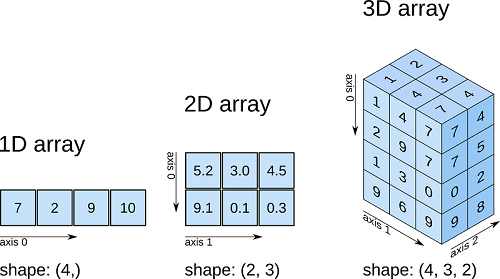<br>


**<center> 1D, 2D, and 3D Arrays[1] </center>**


In [ ]:
import numpy as np

In [ ]:
# 1-dimensional array

arr_1d = np.array([7, 2, 9, 10])

print(arr_1d)

print("Dimension of arr_1d: ",arr_1d.ndim)
print("Shape of arr_1d: ",arr_1d.shape)
print("Size of arr_1d: ",arr_1d.size)

In [ ]:
# 2-dimensional array

arr_2d = np.array([[5.2, 3.0, 4.5], [9.1, 0.1, 0.3]])

print(arr_2d)

print("Dimension of arr_2d: ",arr_2d.ndim)
print("Shape of arr_2d: ",arr_2d.shape)
print("Size of arr_2d: ",arr_2d.size)

In [ ]:
# 3-dimensional array

arr_3d = np.array([[[1, 2],
                    [4, 3],
                    [7, 4]],
                   [[2, 6],
                    [9, 7],
                    [7, 5]],
                   [[1, 3],
                    [3, 5],
                    [0, 2]],
                   [[9, 7],
                    [6, 4],
                    [9, 8]]])
print(arr_3d)

print("Dimension of arr_3d: ",arr_3d.ndim)
print("Shape of arr_3d: ",arr_3d.shape)
print("Size of arr_3d: ",arr_3d.size)

#####<center>**Note:**</center>
Shape of a 3d array - (x, y, z), where x is the 1$^{st}$ dimension, 'y' is the 2$^{nd}$ dimension and 'z' is the 3$^{rd}$ dimension. Total number of elements in a 3d array - **product(xyz)**


####**Indexing and Slicing**

Index starts from '0'

In [ ]:
# prints the element at 0th index position
print(arr_1d[0])

In [ ]:
# prints the element in 2nd row (1st index position), 2nd column (1st index position)
print(arr_2d[1, 1])

In [ ]:
# prints the element from 4th layer (3rd index position), 3rd row (2nd index position), 2nd column (1st index position)
print(arr_3d[3, 2, 1])

In [ ]:
# returns the elements from the 1st index position till the 2nd index position
arr_1d[1:3]

In [ ]:
# returns the elements of 2nd row (1st index position) from the 0th index position till the 2nd index position
arr_2d[1, 0:3]

#####<center>**Note**</center>
For slicing in 3D arrays, first specify the range for the layer, then the rows within those layers, followed by the columns within the layers and rows

In [ ]:
# returns the elements from the 2nd column (1st index position) for the 2nd (1st index position) and
# 3rd (2nd index position) rows within the first 2 layers (0th and 1st index positions)

arr_3d[0:2, 1:3, 1]

###**Future Topics**
* Error Handling and Exceptions
* List Comprehensions
* Regular Expressions
* Database Access
* Multithreading
* Non-linear Regression

###**Resources**
1. [Elegant SciPy](http://uclid.uc.edu/record=b8339887~S39)
2. [CEAS Library Python resources](http://guides.libraries.uc.edu/python)
3. Online links & tutorials
 * [Numpy documentation](https://numpy.org/doc/stable/)
 * [Linear regression in Python](https://realpython.com/linear-regression-in-python/)
 * [Introduction to linear regression](https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0)
 * [Scikit-learn documentation](https://scikit-learn.org/stable/index.html)
 * [Python documentation](https://www.python.org/doc/)
 * [Python programming wiki book](http://en.wikibooks.org/wiki/Python_Programming)
 * Python tutorials - Udemy, Code academy, etc
